# **General Setup**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

#Set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#Tools to build prediction models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.tree import c
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.preprocessing import LabelEncoder

#to tune the model
from sklearn.model_selection import GridSearchCV

#to check model performance
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#Read in data
injury_data = pd.read_csv("/content/drive/MyDrive/BI/Year 2/Fall/APS490/injury_analysis_construction.csv")

FileNotFoundError: ignored

In [ ]:
#Copy data to another variable to avoid any changes to original data
copy_injury_data = injury_data.copy()

## **Data Overview**

In [ ]:
#View the first 5 rows of the dataset
injury_data.head()

In [ ]:
#View the last 5 rows of the dataset
injury_data.tail()

In [ ]:
#See data shape
injury_data.shape

In [ ]:
#Check data info
injury_data.info()

In [ ]:
#See number of null values in each column
injury_data.isnull().sum()

In [ ]:
#Drop columns that will not affect the model
injury_data = injury_data.drop(['accident_date', 'claim_number', 'class_description', 'industry_sector_code_description',
                                'rate_group_code_description', 'cu_id_description', 'noc_occupation_category_description', 
                                'ccdo_occupation_category_description', 'soc_occupation_category_description', 'csa_accident_category_description',
                                'csa_part_of_body_category_description', 'csa_nature_of_injury_category_description', 'accident_month_name'], axis = 1)

In [ ]:
#Drop columns that contain more than 60% of null values and will not affect the model
injury_data = injury_data.drop(['predominant_class', 'accident_time', 'claim_action_description', 'class_subclass_description',
                                'employment_date', 'stickman_2_description', 'stickman_3_description'], axis = 1)

In [ ]:
#See number of null values in each column
injury_data.isnull().sum()

In [ ]:
#View the first 5 rows of the dataset
injury_data.head()

In [ ]:
#Correct data type

#Convert accident_year column to object
injury_data['accident_year'] = injury_data['accident_year'].apply(str)

#Convert accident_month_number column to object
injury_data['accident_month_number'] = injury_data['accident_month_number'].apply(str)

#Convert accident_day_of_month_number column to object
injury_data['accident_day_of_month_number'] = injury_data['accident_day_of_month_number'].apply(str)

#Convert firm_major_rate_group column to object
injury_data['firm_major_rate_group'] = injury_data['firm_major_rate_group'].apply(str)

#Convert firm_major_cu column to object
injury_data['firm_major_cu'] = injury_data['firm_major_cu'].apply(str)


In [ ]:
#Check data info
injury_data.info()

In [ ]:
#Check descriptive statistics of the columns
injury_data.describe().T

In [ ]:
#List of all important categorical variables
categorical_column = ['claim_type_description', 'fatality_indicator', 'injury_disease_category_description', 'fatality_claim_description', 
                      'firm_major_rate_group', 'firm_major_cu', 'full_time_worker_band', 'small_business_indicator', 'naics_description',
                      'sic_description', 'class_subclass', 'gender_code', 'noc_occupation_description', 
                      'ccdo_occupation_description', 'soc_occupation_description', 'csa_accident_type_description', 
                      'fatality_accident_type_description', 'accident_place_description', 'accident_place_municipal_name', 
                      'csa_accident_source_category_description', 'csa_source_injury_description', 'csa_part_of_body_description', 
                      'stickman_1_description', 'csa_nature_of_injury_description', 'accident_year', 'accident_month_number', 
                      'accident_day_of_month_number', 'critical_injury_indicator']

#Print the chance of occurrences for each unique value in each categorical variable
for column in categorical_column:
  print(injury_data[column].value_counts(1))
  print("-" * 50)

In [ ]:
#Drop columns that contain more than 90% of 'NOT APPLICABLE' values
injury_data = injury_data.drop(['injury_disease_category_description', 'fatality_claim_description', 'soc_occupation_description',
                                'fatality_accident_type_description'], axis=1)

In [ ]:
#Drop rows that contain 'NOT APPLICABLE' values
injury_data = injury_data[(injury_data.ccdo_occupation_description != 'NOT APPLICABLE') &
                          (injury_data.noc_occupation_description != 'NOT APPLICABLE') &
                          (injury_data.csa_accident_type_description != 'NOT APPLICABLE') &
                          (injury_data.accident_place_description != 'NOT APPLICABLE') &
                          (injury_data.accident_place_municipal_name != 'NOT APPLICABLE') &
                          (injury_data.csa_accident_source_category_description != 'NOT APPLICABLE') &
                          (injury_data.csa_source_injury_description != 'NOT APPLICABLE') &
                          (injury_data.csa_part_of_body_description != 'NOT APPLICABLE') &
                          (injury_data.csa_nature_of_injury_description != 'NOT APPLICABLE')]

In [ ]:
#See data shape
injury_data.shape

In [ ]:
#See data
injury_data.head()

In [ ]:
#See data info
injury_data.info()

In [ ]:
#Impute missing values with mode
injury_data['naics_description'] = injury_data['naics_description'].fillna(injury_data['naics_description'].mode()[0])
injury_data['sic_description'] = injury_data['sic_description'].fillna(injury_data['sic_description'].mode()[0])
injury_data['class_subclass'] = injury_data['class_subclass'].fillna(injury_data['class_subclass'].mode()[0])

In [ ]:
#Impute missing values with median
accident_age_median = injury_data['accident_age'].median()
injury_data['accident_age'].fillna(value = accident_age_median, inplace=True)

critical_injury_indicator_median = injury_data['occupational_experience_in_years'].median()
injury_data['occupational_experience_in_years'].fillna(value = critical_injury_indicator_median, inplace=True)

In [ ]:
#See data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42764 entries, 7 to 134102
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   claim_type_description                    42764 non-null  object 
 1   fatality_indicator                        42764 non-null  object 
 2   firm_major_rate_group                     42764 non-null  object 
 3   firm_major_cu                             42764 non-null  object 
 4   full_time_worker_band                     42764 non-null  object 
 5   small_business_indicator                  42764 non-null  object 
 6   naics_description                         42764 non-null  object 
 7   sic_description                           42764 non-null  object 
 8   class_subclass                            42764 non-null  object 
 9   gender_code                               42764 non-null  object 
 10  accident_age                     

In [ ]:
#See number of null values in each column
injury_data.isna().sum()

claim_type_description                      0
fatality_indicator                          0
firm_major_rate_group                       0
firm_major_cu                               0
full_time_worker_band                       0
small_business_indicator                    0
naics_description                           0
sic_description                             0
class_subclass                              0
gender_code                                 0
accident_age                                0
occupational_experience_in_years            0
noc_occupation_description                  0
ccdo_occupation_description                 0
csa_accident_type_description               0
accident_place_description                  0
accident_place_municipal_name               0
csa_accident_source_category_description    0
csa_source_injury_description               0
csa_part_of_body_description                0
stickman_1_description                      0
csa_nature_of_injury_description  

# **Exploratory Data Analysis**

## **Univariate Analysis**

In [ ]:
from matplotlib.colorbar import gridspec
#Create function to plot boxplot and histogram along the same scale
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw = {"height_ratios": (0.25, 0.75)},
      figsize = figsize,
  )
  sns.boxplot(
      data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
  )
  sns.histplot(
      data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
  ) if bins else sns.histplot(
      data = data, x = feature, kde = kde, ax = ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(), color = "green", linestyle = "--"
  )
  ax_hist2.axvline(
      data[feature].median(), color = "black", linestyle = "-"
  )

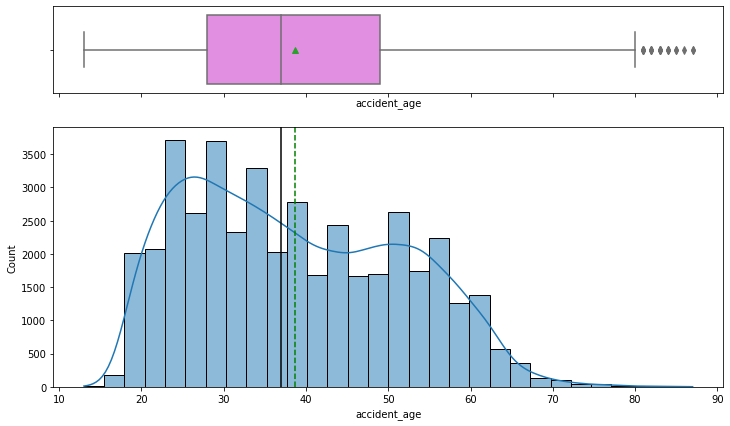

In [ ]:
histogram_boxplot(injury_data, 'accident_age', kde = True, bins = 30)

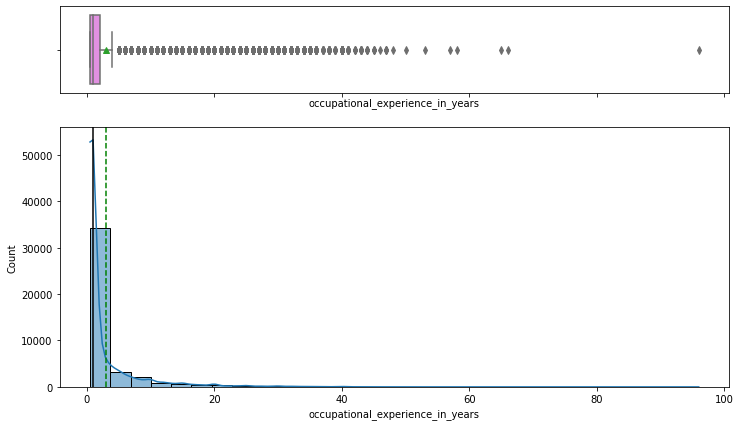

In [ ]:
histogram_boxplot(injury_data, 'occupational_experience_in_years', kde = True, bins = 30)

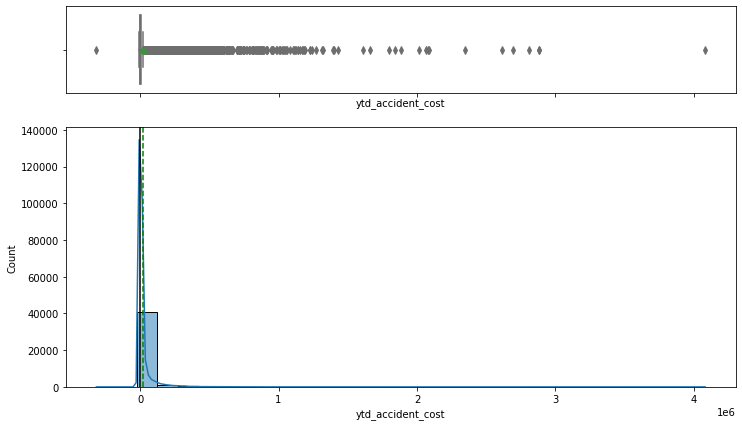

In [ ]:
histogram_boxplot(injury_data, 'ytd_accident_cost', kde = True, bins = 30)

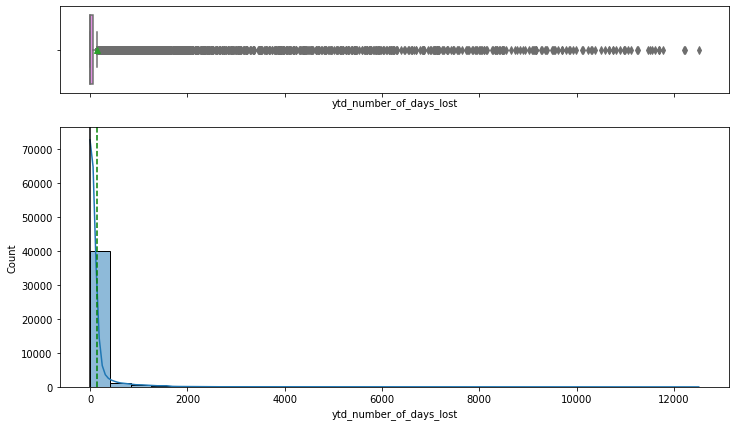

In [ ]:
histogram_boxplot(injury_data, 'ytd_number_of_days_lost', kde = True, bins = 30)

## **Bivariate Analysis**

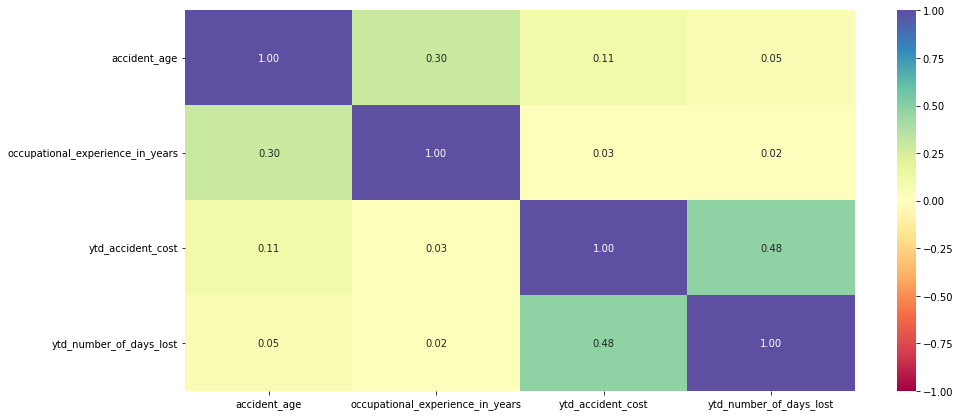

In [ ]:
#Find correlation between numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 7))
sns.heatmap(injury_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

In [ ]:
from numpy.ma.core import count
#Create a function to plot stacked bar plots
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
      by = sorter, ascending = False
  )
  print(tab1)
  print("-" * 120)
  tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
      by = sorter, ascending = False
  )
  tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
  plt.legend(
      loc = "lower left",
      frameon = False,
  )
  plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
  plt.show()

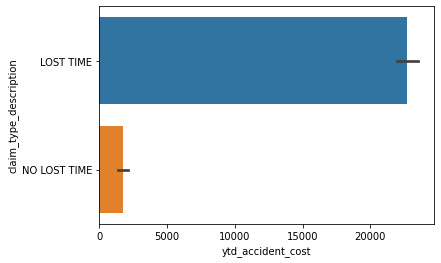

In [ ]:
sns.barplot(y = 'claim_type_description', x = 'ytd_accident_cost', data = injury_data)

small_business_indicator     N      Y    All
claim_type_description                      
All                       4127  38637  42764
LOST TIME                 3960  37798  41758
NO LOST TIME               167    839   1006
------------------------------------------------------------------------------------------------------------------------


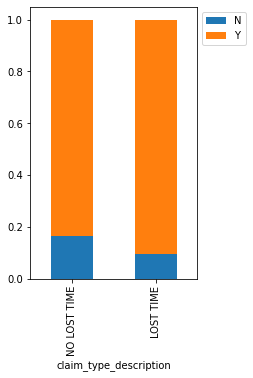

In [ ]:
stacked_barplot(injury_data, 'claim_type_description', 'small_business_indicator')

# **Model Building**

## **Data Preparation**

In [ ]:
#Create dummy variables for categorical variables
injury_data = pd.get_dummies(
    injury_data,
    columns = injury_data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
#Check data
injury_data.head()

,accident_age,occupational_experience_in_years,ytd_accident_cost,ytd_number_of_days_lost,claim_type_description_NO LOST TIME,fatality_indicator_Y,firm_major_rate_group_152,firm_major_rate_group_172,firm_major_rate_group_190,firm_major_rate_group_194,firm_major_rate_group_217,firm_major_rate_group_247,firm_major_rate_group_276,firm_major_rate_group_329,firm_major_rate_group_351,firm_major_rate_group_375,firm_major_rate_group_388,firm_major_rate_group_397,firm_major_rate_group_40,firm_major_rate_group_412,firm_major_rate_group_437,firm_major_rate_group_465,firm_major_rate_group_487,firm_major_rate_group_493,firm_major_rate_group_501,firm_major_rate_group_531,firm_major_rate_group_550,firm_major_rate_group_56,firm_major_rate_group_568,firm_major_rate_group_570,firm_major_rate_group_583,firm_major_rate_group_599,firm_major_rate_group_623,firm_major_rate_group_648,firm_major_rate_group_669,firm_major_rate_group_670,firm_major_rate_group_704,firm_major_rate_group_707,firm_major_rate_group_711,firm_major_rate_group_719,firm_major_rate_group_723,firm_major_rate_group_728,firm_major_rate_group_732,firm_major_rate_group_737,firm_major_rate_group_74,firm_major_rate_group_741,firm_major_rate_group_748,firm_major_rate_group_751,firm_major_rate_group_755,firm_major_rate_group_764,firm_major_rate_group_801,firm_major_rate_group_823,firm_major_rate_group_848,firm_major_rate_group_892,firm_major_rate_group_920,firm_major_rate_group_93,firm_major_rate_group_952,firm_major_cu_10100,firm_major_cu_10200,firm_major_cu_10300,firm_major_cu_10500,firm_major_cu_10700,firm_major_cu_10800,firm_major_cu_10900,firm_major_cu_11000,firm_major_cu_11100,firm_major_cu_1111400,firm_major_cu_1112190,firm_major_cu_1114190,firm_major_cu_1114210,firm_major_cu_1114220,firm_major_cu_11200,firm_major_cu_11300,firm_major_cu_1133110,firm_major_cu_1133120,firm_major_cu_11400,firm_major_cu_11500,firm_major_cu_1151100,firm_major_cu_11600,firm_major_cu_11700,firm_major_cu_11800,firm_major_cu_11900,firm_major_cu_12000,firm_major_cu_12100,firm_major_cu_12300,firm_major_cu_12500,firm_major_cu_12700,firm_major_cu_12800,firm_major_cu_12900,firm_major_cu_13000,firm_major_cu_13300,firm_major_cu_2123150,firm_major_cu_2123230,firm_major_cu_2131170,firm_major_cu_2131190,firm_major_cu_2211130,firm_major_cu_2211210,firm_major_cu_2361100,firm_major_cu_2362100,firm_major_cu_2362200,firm_major_cu_2371100,firm_major_cu_2371200,firm_major_cu_2371300,firm_major_cu_2372100,firm_major_cu_2373100,firm_major_cu_2379900,firm_major_cu_2381100,firm_major_cu_2381200,firm_major_cu_2381300,firm_major_cu_2381400,firm_major_cu_2381500,firm_major_cu_2381600,firm_major_cu_2381700,firm_major_cu_2381900,firm_major_cu_2382100,firm_major_cu_2382200,firm_major_cu_2382910,firm_major_cu_2382990,firm_major_cu_2383100,firm_major_cu_2383200,firm_major_cu_2383300,firm_major_cu_2383400,firm_major_cu_2383500,firm_major_cu_2383900,firm_major_cu_2389100,firm_major_cu_2389900,firm_major_cu_3111190,firm_major_cu_3114200,firm_major_cu_3115150,firm_major_cu_3121100,firm_major_cu_3132100,firm_major_cu_3133200,firm_major_cu_3149100,firm_major_cu_3211110,firm_major_cu_3219110,firm_major_cu_3219190,firm_major_cu_3219920,firm_major_cu_3256100,firm_major_cu_3259990,firm_major_cu_3261960,firm_major_cu_3261980,firm_major_cu_3262200,firm_major_cu_3271099,firm_major_cu_3271200,firm_major_cu_3272140,firm_major_cu_3272150,firm_major_cu_3273200,firm_major_cu_3273300,firm_major_cu_3273900,firm_major_cu_3274200,firm_major_cu_3279900,firm_major_cu_3313170,firm_major_cu_3322100,firm_major_cu_3323110,firm_major_cu_3323190,firm_major_cu_3323210,firm_major_cu_3323290,firm_major_cu_3324100,firm_major_cu_3324200,firm_major_cu_3325100,firm_major_cu_3326190,firm_major_cu_3327100,firm_major_cu_3328100,firm_major_cu_3329990,firm_major_cu_3331100,firm_major_cu_3331200,firm_major_cu_3332450,firm_major_cu_3332480,firm_major_cu_3336110,firm_major_cu_3339100,firm_major_cu_3339200,firm_major_cu_3342200,firm_major_cu_3351200,firm_major_cu_3353120,firm_major

In [ ]:
#Separate independent variables from dependent variable
x = injury_data.drop('ytd_accident_cost', axis = 1)
y = injury_data['ytd_accident_cost']

In [ ]:
#Split the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
#Check the shape of the train and test datasets
print("Shape of the train dataset: ", x_train.shape)
print("Shape of the test dataset: ", x_test.shape)

Shape of the train dataset:  (34211, 3581)
Shape of the test dataset:  (8553, 3581)


## **Linear Regression**

In [ ]:
#Create functions to compute metrics for model evaluation
#Adjust R-squared
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

#Different metrics for the model
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)

  r2 = r2_score(target, pred) #R-squared
  adjr2 = adj_r2_score(predictors, target, pred) #Adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred)) #RMSE
  mae = mean_absolute_error(target, pred) #MAE
  mape = mape_score(target, pred) #MAPE

  #Create dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE": mae,
          "R-squared": r2,
          "Adj. R-squared": adjr2,
          "MAPE": mape,
      },
      index = [0],
  )

  return df_perf

In [ ]:
#RMSE
def rmse(predictions, targets):
  return np.sqrt(((targets - predictions) ** 2).mean())

#MAPE
def mape(predictions, targets):
  return np.mean(np.abs((targets - predictions)) / targets) * 100

#MAE
def mae(predictions, targets):
  return np.mean(np.abs((targets - predictions)))

#Model performance on test and train datasets
def model_perf(olsmodel, x_train, x_test, y_train, y_test):
  y_pred_train = olsmodel.predict(x_train)
  y_observed_train = y_train
  y_pred_test = olsmodel.predict(x_test)
  y_observed_test = y_test

  print(
      pd.DataFrame(
          {
              "Data": ["Train", "Test"],
              "RMSE": [
                  rmse(y_pred_train, y_observed_train),
                  rmse(y_pred_test, y_observed_test)
              ],
              "MAE": [
                  mae(y_pred_train, y_observed_train),
                  mae(y_pred_test, y_observed_test)
              ],
              "MAPE": [
                  mape(y_pred_train, y_observed_train),
                  mape(y_pred_test, y_observed_test)
              ],
          }
      )
  )

In [ ]:
#Add constant
import statsmodels.api as sm

x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()

olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:      ytd_accident_cost   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     11.70
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        07:44:43   Log-Likelihood:            -4.2409e+05
No. Observations:               34211   AIC:                         8.538e+05
Df Residuals:                   31401   BIC:                         8.775e+05
Df Model:                        2809                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# See the performance of the model
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,69257.790797,24604.305253,0.412699,-0.010583,inf


In [ ]:
# See the performance of the model on train and test dataset
model_perf(olsmodel1, x_train1, x_test1, y_train, y_test)

    Data          RMSE           MAE  MAPE
0  Train  58540.020447  21477.341670   inf
1   Test  69257.790797  24604.305253   inf


In [ ]:
#Check multicollinearity
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#def checking_vif(train):
#  vif = pd.DataFrame()
#  vif["feature"] = train.columns

#  vif["VIF"] = [
#      variance_inflation_factor(train.values, i) for i in range(len(train.columns))
#  ]
#  return vif

## **Decision Tree Regressor**

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state = 1)

#Fitting the model
dt_regressor.fit(x_train, y_train)

#Model performance
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,73118.036052,14374.491521,0.345406,-0.12615,inf


## **Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

#Fitting the model
regressor.fit(x_train, y_train)

#Model performance
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,57973.360725,10802.31581,0.58849,0.292047,inf
